<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

# Minería de datos

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Práctica Scikit-Learn 2</h2>

## Docentes

 - Autor: José Francisco Diez Pastor
 - Juan José Rodríguez Diez
 
## Estudiantes (1-2)

- Victor De Marco
- Alejandro Diez

## Descripción de los datos

Tenemos un dataset sintético sobre parkinson. El dataset está basado en un original creado por Rabie El Kharoua y disponible con licencia Creative Commons 4.0.

Los atributos del dataset son:
- Patient ID. Un identificador único del paciente, enteros del 3058 al 5152.
------------
- Age. La edad del paciente, entre 50 y 90 años.
- Gender. El género del paciente 0-Hombre y 1-Mujer.
- Ethnicity. La etnia del paciente codificada de la siguiente forma: 0-Caucasico, 1-Afroamericano, 2-Asiatico, 3-otro.
- EducationLevel. Nivel educativo. Codificaciones: 0-Ninguno, 1-Secundaria, 2-Bachillerato, 3-Universidad.
-------------
- BMI: Índice de masa corporal. 
- Smoking: Indicador de fumador 0-No, 1-Si.
- AlcoholConsumption: Consumo semanal de alcohol en unidades.
- PhysicalActivity: Horas de actividad física a la semana.
- DietQuality: Puntuación cuantitativa de calidad de dienta entre 0 y 10.
- SleepQuality. Puntuación de calidad del sueño de 4 a 10.
- FamilyHistoryParkinsons: Antecedentes familiares de la enfermedad 0-No, 1-Si
- TraumaticBrainInjury: Historial de traumatismo cerebral 0-No, 1-Si.
- Hypertension: Presencia de hipertensión 0-No, 1-Si.
- Diabetes: Presencia de diabetes 0-No, 1-Si.
- Depression: Presencia de depresión 0-No, 1-Si.
- Stroke: Historial de ictus 0-No, 1-Si.
-------------------------
- SystolicBP: Presión sanguinea sistólica, en mmHg.
- DiastolicBP: Presión sanguinea diastólica, en mmHg. 
- CholesterolTotal: Colesterol total, en mg/dL.
- CholesterolLDL: Colesterol (Low-density lipoprotein), en mg/dL.
- CholesterolHDL: Colesterol (High-density lipoprotein), en mg/dL.
- CholesterolTriglycerides: Nivel de triglicéridos, en mg/dL.
-----------------------------
- MoCA: Montreal Cognitive Assessment score. Entre 0 y 30, valores bajos indican ranging from 0 to 30. Lower scores indicate deficit cognitivo.
- FunctionalAssessment: Puntuación de la evaluación funcional. entre 0 y 10. Valores bajos indican mayor discapacidad. 
------------------------
- Tremor: Presencia de temblores, 0-No, 1-Si.
- Rigidity: Presencia de rigidez muscular, 0-No, 1-Si. 
- Bradykinesia: Presencia de bradicinesia (lentitud de movimientos), 0-No, 1-Si. 
- PosturalInstability: Presencia de inestabilidad postural, 0-No, 1-Si. 
- SpeechProblems: Presencia de problemas del habla, 0-No, 1-Si. 
- SleepDisorders: Presencia de desordenes del sueño, 0-No, 1-Si. 
- Constipation: Presencia de estreñimiento, 0-No, 1-Si. 

Clase

- Diagnosis: Presencia de enfermedad de parkinson 0-No, 1-Si. 

--------------
--------------

Como la teoría a veces no funciona en la práctica, también hay 2 datasets sintéticos más sencillos, que se cargan desde un fichero serializado.

- `X_sintetico_3d_50missing`. Es un conjunto de datos de 3 dimensiones, 100 filas. Los datos se corresponden con 2 círculos concéntricos en 3D, cada uno es de una clase diferente. Se han añadido missings en el 50% de las filas, solamente para probar la eficacia de los algoritmos de imputación de missings.
- `X_sintetico_3d_extra_atts5`. Es un conjunto de datos de 3 dimensiones, 100 filas. Los datos se corresponden con 2 círculos concéntricos en 3D, cada uno es de una clase diferente. Se han añadido 5 atributos aleatorios. Solamente para probar la eficacia de los algoritmos de selección de atributos.
- `y_sintetico`. Las clases de los datasets anteriores.

In [10]:
import os
import pickle
# Cargar los datos usando pickle.load
with open("."+os.sep+"data"+os.sep+"datos.pkl", "rb") as file:
    loaded_data = pickle.load(file)

print("Datos cargados")

X_sintetico_3d_50missing = loaded_data["3d_50_missings"]
X_sintetico_3d_extra_atts5 = loaded_data["3d_5_extra_atts"]
y_sintetico = loaded_data["y_sintetico"]

display(X_sintetico_3d_extra_atts5[:5])


Datos cargados


array([[ -19.06482396,  -20.03520667,  -19.94093443,  -42.61029514,
        -142.68361721,  170.54227101,   67.39669176,   19.91080521],
       [ -19.01156395,  -19.87654905,  -20.03735875, -153.7075633 ,
         -95.09938055,   -3.57767194, -152.02299969,  -75.01179977],
       [ -18.97834095,  -19.75188668,  -20.13871523,  121.27152157,
          -3.66476372,   41.0423248 ,  -43.67539563,  -75.08968463],
       [ -19.10577604,  -19.67984482,  -19.98459498,   95.46899303,
          -7.89229463,  -21.86456067,   -9.49928197,   60.64284236],
       [ -19.12025338,  -19.43177509,  -19.99433641,   49.79089427,
         -43.2688032 ,    2.98694533,   79.14464137,  -43.83181082]])

In [11]:
'''
Carga de los datos Parkinson
'''
import pandas as pd
import os

df = pd.read_csv("."+os.sep+"data"+os.sep+"data.csv",index_col=0)

display(df.head())


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,LevodopaDailyDoseFake,MotorScoreFake,NonMotorScoreFake,AnnualHospitalizationsFake,DailyStepCountFake,SleepDurationFake,CognitiveReactionTimeFake,MedicationCountFake,DopamineLevelFake,Diagnosis
0,3058,85.0,0.0,3.0,1.0,19.619878,0.0,5.108241,1.380660,3.893969,...,6.723289,18,74,6,1505,3.836579,4.048667,2,14.259334,0
1,3059,75.0,0.0,0.0,2.0,16.247339,1.0,6.027648,8.409804,8.513428,...,9.139299,74,8,6,3149,9.122020,1.801746,1,12.184397,1
2,3060,70.0,1.0,0.0,0.0,15.368239,NaN,2.242135,0.213275,6.498805,...,8.620195,51,34,1,1626,7.886650,3.713104,6,5.263363,1
3,3061,52.0,0.0,0.0,0.0,15.454557,0.0,5.997788,1.375045,6.715033,...,5.051444,12,10,6,4507,9.117671,2.769782,5,6.290959,1
4,3062,87.0,0.0,0.0,1.0,18.616042,0.0,9.775243,1.188607,4.657572,...,4.035046,92,33,1,3518,5.841760,1.974326,5,2.647060,0


<a id="index"></a>
## Tareas 

1. [Exploración de los datos. **(1 Punto)**](#1)
2. [Tabla resumen y visualizaciones.**(1 Puntos)**](#2)
3. [Validación cruzada propia.**(2 Puntos)**](#3)
4. [Imputación de missings.**(2 Puntos)**](#4)
5. [Selección de atributos.**(2 Puntos)**](#5)
6. [Prueba otras cosas.**(2 Puntos)**](#6)

-----------------



###  Tarea 1. Exploración de los datos. (1 Punto)<a id="1"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


Analiza el conjunto de datos.
1. Número de filas y columnas.
2. Proporción entre las clases.
3. Proporción de nulos en los atributos. De más a menos nulos, los 20 primeros.


**resultado esperado**

```
El dataset tiene 2105 filas y 42 columnas

Si    61.95
No    38.05
Name: count, dtype: float64

Stroke                        7.65
PosturalInstability           7.41
TraumaticBrainInjury          7.36
Diabetes                      7.36
Bradykinesia                  6.89
Hypertension                  6.70
Depression                    6.41
FamilyHistoryParkinsons       6.03
SleepDisorders                5.89
Smoking                       5.75
SpeechProblems                5.18
Tremor                        4.42
Gender                        4.18
Constipation                  4.13
Rigidity                      3.71
Ethnicity                     3.42
EducationLevel                2.23
Age                           0.14
DiastolicBP                   0.10
AnnualHospitalizationsFake    0.00
dtype: float64
```

In [12]:
filas, columnas = df.shape
print("El dataset tiene {} filas y {} columnas".format(filas, columnas), "\n")

proporcion = df["Diagnosis"].value_counts(normalize=True) * 100
proporcion = proporcion.round(2)
proporcion = proporcion.rename(index={1: "Si", 0: "No"})
print(proporcion, "\n")

proporcion_nulos = df.isnull().mean() * 100
proporcion_nulos = proporcion_nulos.round(2)
proporcion_nulos = proporcion_nulos.sort_values(ascending=False)
print(proporcion_nulos.head(20))

El dataset tiene 2105 filas y 42 columnas 

Diagnosis
Si    61.95
No    38.05
Name: proportion, dtype: float64 

Stroke                        7.65
PosturalInstability           7.41
TraumaticBrainInjury          7.36
Diabetes                      7.36
Bradykinesia                  6.89
Hypertension                  6.70
Depression                    6.41
FamilyHistoryParkinsons       6.03
SleepDisorders                5.89
Smoking                       5.75
SpeechProblems                5.18
Tremor                        4.42
Gender                        4.18
Constipation                  4.13
Rigidity                      3.71
Ethnicity                     3.42
EducationLevel                2.23
Age                           0.14
DiastolicBP                   0.10
AnnualHospitalizationsFake    0.00
dtype: float64


###  Tarea 2. Tabla resumen y visualizaciones. (1 Punto)<a id="2"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

1. Tabla resumen
2. Grafica de barras.

#### Tabla resumen
Crea una tabla resumen que para cada atributo tenga:
- %M. Porcentaje missings.
- Un. Valores únicos (los DataFrame tienen un método `nunique`).
- Min. Valor mínimo.
- Max. Valor máximo.
- Avg. Media.
- Std. Desviación tipica.


**resultado esperado**
|                            |   %M |   Un. |           Min. |       Max. |         Avg. |        Std. |
|:---------------------------|-----:|------:|---------------:|-----------:|-------------:|------------:|
| PatientID                  | 0    |  2105 | 3058           | 5162       | 4110         |  607.805    |
| Age                        | 0.14 |    40 |   50           |   89       |   69.5923    |   11.5937   |
| Gender                     | 4.18 |     2 |    0           |    1       |    0.493803  |    0.500086 |
| Ethnicity                  | 3.42 |     4 |    0           |    3       |    0.711756  |    1.01152  |
| EducationLevel             | 2.23 |     4 |    0           |    3       |    1.33868   |    0.900208 |
| BMI                        | 0    |  2105 |   15.0083      |   39.9999  |   27.2095    |    7.2081   |
| Smoking                    | 5.75 |     2 |    0           |    1       |    0.306452  |    0.461136 |
| AlcoholConsumption         | 0    |  2105 |    0.00222796  |   19.9889  |   10.0404    |    5.68701  |
| PhysicalActivity           | 0    |  2105 |    0.00415669  |    9.99525 |    5.01667   |    2.89092  |
| DietQuality                | 0    |  2105 |    1.05382e-05 |    9.99586 |    4.9129    |    2.87211  |
| SleepQuality               | 0    |  2105 |    4.0005      |    9.99982 |    6.99664   |    1.75307  |
| FamilyHistoryParkinsons    | 6.03 |     2 |    0           |    1       |    0.153691  |    0.360743 |
| TraumaticBrainInjury       | 7.36 |     2 |    0           |    1       |    0.113846  |    0.317706 |
| Hypertension               | 6.7  |     2 |    0           |    1       |    0.153259  |    0.360328 |
| Diabetes                   | 7.36 |     2 |    0           |    1       |    0.157436  |    0.364305 |
| Depression                 | 6.41 |     2 |    0           |    1       |    0.213706  |    0.410025 |
| Stroke                     | 7.65 |     2 |    0           |    1       |    0.0529835 |    0.224058 |
| SystolicBP                 | 0    |    90 |   90           |  179       |  133.72      |   26.5024   |
| DiastolicBP                | 0.1  |    60 |   60           |  119       |   90.2649    |   17.0596   |
| CholesterolTotal           | 0    |  2105 |  150.063       |  299.963   |  226.861     |   43.5894   |
| CholesterolLDL             | 0    |  2105 |   50.0228      |  199.986   |  126.148     |   43.407    |
| CholesterolHDL             | 0    |  2105 |   20.028       |   99.9823  |   59.6704    |   23.3709   |
| CholesterolTriglycerides   | 0    |  2105 |   50.1136      |  399.975   |  222.94      |  101.896    |
| MoCA                       | 0    |  2105 |    0.0211912   |   29.9701  |   15.0943    |    8.64301  |
| FunctionalAssessment       | 0    |  2105 |    0.00150512  |    9.9927  |    4.98969   |    2.93388  |
| Tremor                     | 4.42 |     2 |    0           |    1       |    0.434394  |    0.4958   |
| Rigidity                   | 3.71 |     2 |    0           |    1       |    0.26147   |    0.439544 |
| Bradykinesia               | 6.89 |     2 |    0           |    1       |    0.220408  |    0.414628 |
| PosturalInstability        | 7.41 |     2 |    0           |    1       |    0.147768  |    0.354961 |
| SpeechProblems             | 5.18 |     2 |    0           |    1       |    0.301102  |    0.458852 |
| SleepDisorders             | 5.89 |     2 |    0           |    1       |    0.256436  |    0.436776 |
| Constipation               | 4.13 |     2 |    0           |    1       |    0.303271  |    0.459785 |
| LevodopaDailyDoseFake      | 0    |  2105 |    0.00113427  |    9.99008 |    4.98516   |    2.90696  |
| MotorScoreFake             | 0    |   100 |    0           |   99       |   50.0052    |   28.8904   |
| NonMotorScoreFake          | 0    |   100 |    0           |   99       |   48.7321    |   28.9259   |
| AnnualHospitalizationsFake | 0    |     7 |    1           |    7       |    3.95107   |    2.01279  |
| DailyStepCountFake         | 0    |  1694 | 1505           | 5998       | 3758.49      | 1295.43     |
| SleepDurationFake          | 0    |  2105 |    3.00014     |    9.99834 |    6.57667   |    2.04185  |
| CognitiveReactionTimeFake  | 0    |  2105 |    0.500512    |    4.99868 |    2.77361   |    1.32629  |
| MedicationCountFake        | 0    |     8 |    0           |    7       |    3.49644   |    2.30166  |
| DopamineLevelFake          | 0    |  2105 |    0.514678    |   14.9836  |    7.88379   |    4.13878  |
| Diagnosis                  | 0    |     2 |    0           |    1       |    0.619477  |    0.485631 |

In [13]:
resumen = pd.DataFrame(
    {
        "%M": df.isnull().mean() * 100,
        "Un": df.nunique(),
        "Min": df.min(numeric_only=True),
        "Max": df.max(numeric_only=True),
        "Avg": df.mean(numeric_only=True),
        "Std": df.std(numeric_only=True),
    }
)
display(resumen)

,%M,Un,Min,Max,Avg,Std
PatientID,0.000000,2105,3058.000000,5162.000000,4110.000000,607.805479
Age,0.142518,40,50.000000,89.000000,69.592293,11.593660
Gender,4.180523,2,0.000000,1.000000,0.493803,0.500086
Ethnicity,3.420428,4,0.000000,3.000000,0.711756,1.011521
EducationLevel,2.232779,4,0.000000,3.000000,1.338678,0.900208
BMI,0.000000,2105,15.008333,39.999887,27.209493,7.208099
Smoking,5.748219,2,0.000000,1.000000,0.306452,0.461136
AlcoholConsumption,0.000000,2105,0.002228,19.988866,10.040413,5.687014
PhysicalActivity,0.000000,2105,0.004157,9.995255,5.016674,2.890919
DietQuality,0.000000,2105,0.000011,9.995864,4.912901,2.872115


#### Gráfica de barras.

1. Crea una tabla de contingencia Diagnosis (Diagnóstico) y Tremor (temblores).
2. Crea un gráfico de barras agrupadas.
3. (Si quieres investiga como poner título, ejes, etc)

**resultado esperado**

<img style="float:left" width="70%" src="pics/barras.png">



Temblor         No   Si
Parkinson              
Sin parkinson  553  196
Con parkinson  585  678


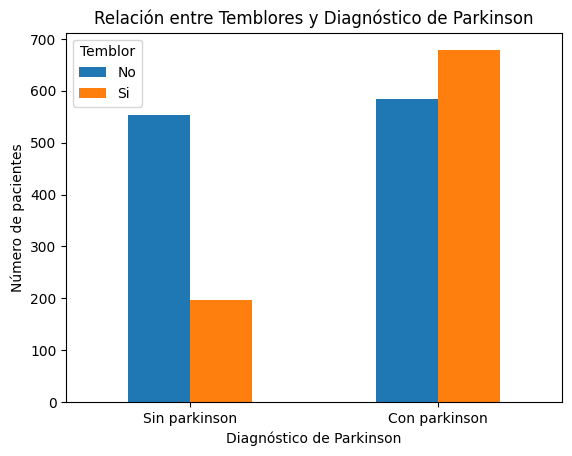

In [14]:
import matplotlib.pyplot as plt

# Tabla de contingencia
tabla = pd.crosstab(
    df["Diagnosis"], df["Tremor"], rownames=["Parkinson"], colnames=["Temblor"]
)
tabla = tabla.rename(
    index={0: "Sin parkinson", 1: "Con parkinson"},
    columns={0: "No", 1: "Si"},
)
print(tabla)

# Grafico de barras
tabla.plot(kind='bar')
plt.title("Relación entre Temblores y Diagnóstico de Parkinson")
plt.xlabel("Diagnóstico de Parkinson")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=0)
plt.show()

###  Tarea 3. Validación cruzada propia. (2 Puntos)<a id="3"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Sklearn tiene una clase llamada `StratifiedKFold`, permite generar particiones train/test estratificadas (con la misma proporción entre clases que el conjunto de datos original).

Esta clase permite que nos programemos nuestra propia validación cruzada.

Veamos un ejemplo.

In [15]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

X_toy = np.array([[1, 2], 
              [3, 4], 
              [5, 6], 
              [7, 8],
              [9, 10],
              [11, 12]])
y_toy = np.array([0, 0, 0, 1, 1, 1])
skf = StratifiedKFold(n_splits=3,random_state=0,shuffle=True)
print(skf)
for i, (train_index, test_index) in enumerate(skf.split(X_toy, y_toy)):
    print(f"\nFold {i}:")
    print(f"  Train: index={train_index}")
    display(X_toy[train_index])
    print(f"  Test:  index={test_index}")
    display(X_toy[test_index])

StratifiedKFold(n_splits=3, random_state=0, shuffle=True)

Fold 0:
  Train: index=[0 1 3 5]


array([[ 1,  2],
       [ 3,  4],
       [ 7,  8],
       [11, 12]])

  Test:  index=[2 4]


array([[ 5,  6],
       [ 9, 10]])


Fold 1:
  Train: index=[0 2 3 4]


array([[ 1,  2],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

  Test:  index=[1 5]


array([[ 3,  4],
       [11, 12]])


Fold 2:
  Train: index=[1 2 4 5]


array([[ 3,  4],
       [ 5,  6],
       [ 9, 10],
       [11, 12]])

  Test:  index=[0 3]


array([[1, 2],
       [7, 8]])

Crea las funciones:

- `perform_experiment(X,y,method,n_folds)`: Recibe atributos, clase, algoritmo de clasificación y número de folds. Realiza la validación cruzada y almacena para cada fold las clases reales y las predicciones. Devuelve 2 listas, la lista de lista de valores de clase reales y la lista de lista de predicciones.
- `evalua_predicciones(y_reales, y_predichas,metric_f)`: Aplica la función de calculo de métrica `metric_f` a todas las listas de valores reales y predicciones

Ejemplo de uso:

```Python
y_reales, y_predichas = perform_experiment(X_iris,y_iris,KNeighborsClassifier(),10)
print(len(y_reales)) # Es una lista de tamaño 10 porque he hecho 10 folds
print(len(y_predichas)) # Es una lista de tamaño 10 porque he hecho 10 folds
print(y_reales[0],y_predichas[0]) # Valores reales y predichos para las instancias de test del primer fold
```

```
10
10
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2] [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
```

In [16]:
from sklearn.neighbors import KNeighborsClassifier

"""
Pruebo con iris
"""
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris["data"]
y_iris = iris["target"]


def perform_experiment(X, y, method, n_folds):
    X = np.array(X).copy()
    y = np.array(y).copy()
    
    reales = []
    preds_list = []
    skf = StratifiedKFold(n_splits=n_folds, random_state=0, shuffle=True)
    for _, (train_index, test_index) in enumerate(skf.split(X, y)):
        # Dividir en train y test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Entrenar y predecir
        method.fit(X_train, y_train)
        preds = method.predict(X_test)
        # Guardar resultados
        reales.append(y_test)
        preds_list.append(preds)
    return reales, preds_list


y_reales, y_predichas = perform_experiment(X_iris, y_iris, KNeighborsClassifier(), 10)
print(len(y_reales))  # Es una lista de tamaño 10 porque he hecho 10 folds
print(len(y_predichas))  # Es una lista de tamaño 10 porque he hecho 10 folds
print(
    y_reales[0], y_predichas[0]
)  # Valores reales y predichos para las instancias de test del primer fold

10
10
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2] [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


Ejemplo de uso:

```Python
tasas_de_acierto = evalua_predicciones(y_reales, y_predichas,accuracy_score)
print(tasas_de_acierto) # 10 tasas de acierto, porque he hecho 10 folds
print(tasas_de_acierto.mean()) # La media 
```

```
[1.         0.93333333 0.93333333 1.         0.93333333 0.93333333
 0.93333333 1.         0.93333333 0.93333333]
0.9533333333333334
```

In [17]:
from sklearn.metrics import accuracy_score


def evalua_predicciones(y_reales, y_predichas, metric_f):
    return np.array(
        [metric_f(y_reales[i], y_predichas[i]) for i in range(len(y_reales))]
    )


tasas_de_acierto = evalua_predicciones(y_reales, y_predichas, accuracy_score)
print(tasas_de_acierto)  # 10 tasas de acierto, porque he hecho 10 folds
print(tasas_de_acierto.mean())  # La media

[1.         0.93333333 0.93333333 1.         0.93333333 0.93333333
 0.93333333 1.         0.93333333 0.93333333]
0.9533333333333334


###  Tarea 4. Imputación de missings. (2 Puntos)<a id="4"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>



Crea dos Pipelines para imputar los valores missing, uno de ellos para sustituir los missing por la media de ese atributo, el otro para sustituir los missings por el valor de ese atributo en el vecino más cercano.

Prueba los pipelines con el conjunto de datos sintético y con el de parkinson.
Pruebalo con varios clasificadores (cambiando el último paso del pipeline).


Resultado esperado con `X_sintetico_3d_50missing`.

-------
```Python
Pipeline(steps=[('imputer', SimpleImputer()), ('cls', KNeighborsClassifier())])
Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1)),
                ('cls', KNeighborsClassifier())])

Pipeline Imputer Mean - KNNClassifier: 0.58
Pipeline Imputer KNN - KNNClassifier: 0.69
```
-----


In [18]:
'''
Función proporcionada para dividir el DataFrame en atributos X y clase y.
'''
def split_att_target(df,target_name):
    X = df.drop(target_name,axis=1).values
    y = df[target_name].values
    return X,y


X, y = split_att_target(df,"Diagnosis")

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

datasets = [
    ("X_sintetico_3d_50missing", X_sintetico_3d_50missing, y_sintetico),
    ("Parkinson", *split_att_target(df, "Diagnosis")),
]

clasificadores = [
    lambda: KNeighborsClassifier(),
    lambda: RandomForestClassifier(),
    lambda: SVC(),
    lambda: DecisionTreeClassifier(),
]

for dataset_name, X, y in datasets:
    print(f"\nDataset: {dataset_name}")
    for c in clasificadores:
        pipeline_mean = Pipeline(
            [("imputer", SimpleImputer(strategy="mean")), ("cls", c())]
        )
        pipeline_knn = Pipeline([("imputer", KNNImputer(n_neighbors=1)), ("cls", c())])
        classifier_name = c().__class__.__name__

        print(f"    {pipeline_mean}")
        print(f"    {pipeline_knn}")

        y_reales, y_predichas = perform_experiment(X, y, pipeline_mean, 10)
        tasa_acierto = evalua_predicciones(y_reales, y_predichas, accuracy_score)
        print(
            f"  - Pipeline Imputer Mean - {classifier_name}: {tasa_acierto.mean():.2f}"
        )
        y_reales, y_predichas = perform_experiment(X, y, pipeline_knn, 10)
        tasa_acierto = evalua_predicciones(y_reales, y_predichas, accuracy_score)
        print(
            f"  - Pipeline Imputer KNN - {classifier_name}: {tasa_acierto.mean():.2f}"
        )


Dataset: X_sintetico_3d_50missing
    Pipeline(steps=[('imputer', SimpleImputer()), ('cls', KNeighborsClassifier())])
    Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1)),
                ('cls', KNeighborsClassifier())])
  - Pipeline Imputer Mean - KNeighborsClassifier: 0.58
  - Pipeline Imputer KNN - KNeighborsClassifier: 0.69
    Pipeline(steps=[('imputer', SimpleImputer()),
                ('cls', RandomForestClassifier())])
    Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1)),
                ('cls', RandomForestClassifier())])
  - Pipeline Imputer Mean - RandomForestClassifier: 0.66
  - Pipeline Imputer KNN - RandomForestClassifier: 0.67
    Pipeline(steps=[('imputer', SimpleImputer()), ('cls', SVC())])
    Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1)), ('cls', SVC())])
  - Pipeline Imputer Mean - SVC: 0.67
  - Pipeline Imputer KNN - SVC: 0.77
    Pipeline(steps=[('imputer', SimpleImputer()),
                ('cls', DecisionTreeClassifier())])
    Pipeline(s

###  Tarea 5. Selección de atributos. (2 Puntos)<a id="5"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


Crea un Pipeline, que además del paso de imputación de missings haga selección de atributos usando un modelo (ExtraTreesClassifier).

Pruebalo con los datos sintéticos y con los datos de Parkinson.

Probado con `X_sintetico_3d_extra_atts5`

```Python
print(pipe_knn_attsel_cls)
print(cls)


print("KNNClassifier:",acc_knn.round(2))
print("Pipeline Att Sel - KNNClassifier:",acc_attsel.round(2))
```

```
Pipeline(steps=[('imputer_knn', KNNImputer(n_neighbors=1)),
                ('att_sel',
                 SelectFromModel(estimator=ExtraTreesClassifier(n_estimators=200))),
                ('cls', KNeighborsClassifier())])
KNeighborsClassifier()
KNNClassifier: 0.62
Pipeline Att Sel - KNNClassifier: 1.0
```

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier


datasets = [
    ("X_sintetico_3d_50missing", X_sintetico_3d_extra_atts5, y_sintetico),
    ("Parkinson", *split_att_target(df, "Diagnosis")),
]

for dataset_name, X, y in datasets:
    print(f"\nDataset: {dataset_name}")
    pipeline_knn = Pipeline(
        [
            ("imputer", KNNImputer(n_neighbors=1)),
            ("cls", KNeighborsClassifier()),
        ]
    )
    pipeline_knn_att = Pipeline(
        [
            ("imputer", KNNImputer(n_neighbors=1)),
            (
                "att_sel",
                SelectFromModel(estimator=ExtraTreesClassifier(n_estimators=200)),
            ),
            ("cls", KNeighborsClassifier()),
        ]
    )

    print(f"    {pipeline_knn}")
    print(f"    {pipeline_knn_att}")

    y_reales, y_predichas = perform_experiment(X, y, pipeline_knn, 10)
    tasa_acierto = evalua_predicciones(y_reales, y_predichas, accuracy_score)
    y_reales, y_predichas = perform_experiment(X, y, pipeline_knn_att, 10)
    tasa_acierto_att = evalua_predicciones(y_reales, y_predichas, accuracy_score)
    print(f"KNNClassifier: {tasa_acierto.mean():.2f}")
    print(f"Pipeline Att Sel - KNNClassifier: {tasa_acierto_att.mean():.2f}")


Dataset: X_sintetico_3d_50missing
    Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1)),
                ('cls', KNeighborsClassifier())])
    Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1)),
                ('att_sel',
                 SelectFromModel(estimator=ExtraTreesClassifier(n_estimators=200))),
                ('cls', KNeighborsClassifier())])
KNNClassifier: 0.62
Pipeline Att Sel - KNNClassifier: 1.00

Dataset: Parkinson
    Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1)),
                ('cls', KNeighborsClassifier())])
    Pipeline(steps=[('imputer', KNNImputer(n_neighbors=1)),
                ('att_sel',
                 SelectFromModel(estimator=ExtraTreesClassifier(n_estimators=200))),
                ('cls', KNeighborsClassifier())])
KNNClassifier: 0.56
Pipeline Att Sel - KNNClassifier: 0.57


###  Tarea 6. Prueba otras cosas. (2 Puntos)<a id="6"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Prueba otros clasificadores aparte de KNN.
Prueba otras transformaciones de los datos en los Pipelines, por ejemplo Standarizar los datos.
Optimiza clasificadores, por ejemplo usando GridSearch o RandomSearch
Haz una tabla comparativa.


In [21]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
datasets = [
    ("X_sintetico_3d_50missing", X_sintetico_3d_extra_atts5, y_sintetico),
    ("Parkinson", *split_att_target(df, "Diagnosis")),
]
clasificadores = [
    lambda: RandomForestClassifier(),
    lambda: SVC(),
    lambda: DecisionTreeClassifier(),
]

parameter_por_modelo = {
    "RandomForestClassifier": {
        "cls__n_estimators": [100, 200, 300],
        "cls__max_depth": [None, 10, 20],
    },
    "SVC": {
        "cls__C": [0.1, 1, 10],
        "cls__kernel": ["linear", "rbf"],
    },
    "DecisionTreeClassifier": {
        "cls__max_depth": [None, 10, 20],
        "cls__criterion": ["gini", "entropy"],
    },
}

resultados = []

for dataset_name, X, y in datasets:
    print(f"\nDataset: {dataset_name}")
    for c in clasificadores:
        pipelineS = Pipeline(
            [
                ("impute", KNNImputer(n_neighbors=1)),
                ("scaler", StandardScaler()),
                ("cls", c()),
            ]
        )
        pipelineM = Pipeline(
            [
                ("impute", KNNImputer(n_neighbors=1)),
                ("scaler", MinMaxScaler()),
                ("cls", c()),
            ]
        )

        classifier_name = c().__class__.__name__
        print(f"    {pipelineS}")
        print(f"    {pipelineM}")

        y_reales, y_predichas = perform_experiment(X, y, pipelineS, 10)
        tasa_aciertoS = evalua_predicciones(y_reales, y_predichas, accuracy_score)
        y_reales, y_predichas = perform_experiment(X, y, pipelineM, 10)
        tasa_aciertoM = evalua_predicciones(y_reales, y_predichas, accuracy_score)
        print(
            f"  - Pipeline scaler Standard - {classifier_name}: {tasa_aciertoS.mean():.2f}"
        )
        print(
            f"  - Pipeline scaler MinMax - {classifier_name}: {tasa_aciertoM.mean():.2f}"
        )
        param_grid = parameter_por_modelo.get(classifier_name, {})
        grid_searchS = GridSearchCV(pipelineS, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
        grid_searchM = GridSearchCV(pipelineM, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
        grid_searchS.fit(X, y)
        grid_searchM.fit(X, y)
        print(f"Mejor modelo para {classifier_name} con Standard scaler: {grid_searchS.best_params_}")
        print(f"Mejor modelo para {classifier_name} con MinMax scaler: {grid_searchM.best_params_}")
        # Guardar resultados en la lista
        resultados.append([dataset_name, classifier_name, "StandardScaler", tasa_aciertoS.mean(), grid_searchS.best_params_])
        resultados.append([dataset_name, classifier_name, "MinMaxScaler", tasa_aciertoM.mean(), grid_searchM.best_params_])

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados, columns=["Dataset", "Clasificador", "Scaler", "Accuracy", "Best Params"])

# Mostrar tabla ordenada por dataset y accuracy descendente
df_resultados = df_resultados.sort_values(by=["Dataset", "Accuracy"], ascending=[True, False])

# Imprimir tabla
print(df_resultados)





Dataset: X_sintetico_3d_50missing
    Pipeline(steps=[('impute', KNNImputer(n_neighbors=1)),
                ('scaler', StandardScaler()),
                ('cls', RandomForestClassifier())])
    Pipeline(steps=[('impute', KNNImputer(n_neighbors=1)),
                ('scaler', MinMaxScaler()), ('cls', RandomForestClassifier())])
  - Pipeline scaler Standard - RandomForestClassifier: 0.92
  - Pipeline scaler MinMax - RandomForestClassifier: 0.91
Mejor modelo para RandomForestClassifier con Standard scaler: {'cls__max_depth': 10, 'cls__n_estimators': 100}
Mejor modelo para RandomForestClassifier con MinMax scaler: {'cls__max_depth': None, 'cls__n_estimators': 100}
    Pipeline(steps=[('impute', KNNImputer(n_neighbors=1)),
                ('scaler', StandardScaler()), ('cls', SVC())])
    Pipeline(steps=[('impute', KNNImputer(n_neighbors=1)),
                ('scaler', MinMaxScaler()), ('cls', SVC())])
  - Pipeline scaler Standard - SVC: 0.56
  - Pipeline scaler MinMax - SVC: 0.74
Mejor m

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejor modelo para DecisionTreeClassifier con Standard scaler: {'cls__criterion': 'entropy', 'cls__max_depth': 10}
Mejor modelo para DecisionTreeClassifier con MinMax scaler: {'cls__criterion': 'entropy', 'cls__max_depth': 10}
                     Dataset            Clasificador          Scaler  \
7                  Parkinson  RandomForestClassifier    MinMaxScaler   
6                  Parkinson  RandomForestClassifier  StandardScaler   
9                  Parkinson                     SVC    MinMaxScaler   
8                  Parkinson                     SVC  StandardScaler   
10                 Parkinson  DecisionTreeClassifier  StandardScaler   
11                 Parkinson  DecisionTreeClassifier    MinMaxScaler   
4   X_sintetico_3d_50missing  DecisionTreeClassifier  StandardScaler   
5   X_sintetico_3d_50missing  DecisionTreeClassifier    MinMaxScaler   
0   X_sintetico_3d_50missing  RandomForestClassifier  StandardScaler   
1   X_sintetico_3d_50missing  RandomForestClassifier  